### Método da bisseção:

#### Pelo [teorema do valor intermediário](https://https://pt.wikipedia.org/wiki/Teorema_do_valor_intermedi%C3%A1rio), se dois pontos $a$ e $b$ satisfazem $f(a)f(b) < 0$, então existe um ponto $c$ no intervalo $(a, b)$ t.q. $f(c) = 0$.

####![](https://upload.wikimedia.org/wikipedia/commons/thumb/b/b1/Teorema_de_Bolzano.svg/330px-Teorema_de_Bolzano.svg.png)

#### O método da bisseção busca encontrar $c$ através da redução do intervalo $(a, b)$

#### Recursivo:

In [ ]:
#Metodo da bisseção
import numpy as np

def fun(x):
    #exemplos de funções
    #y = np.e**x - np.sin(x) - 2
    #y = x + np.log(x) - 2
    y = np.sqrt(x) - np.cos(x)
    return y

#variáveis globais
counter = 0
epsilon = 1E-13

def bisec(a, b):

    c = (a + b) / 2
    y = fun(c)

    global counter
    counter += 1

    if abs(y) <= epsilon:
        print('a raiz se encontra em x = {}; convergiu em {} iterações'.format(c, counter))
        return c
    if y > 0:
        if fun(a) < fun(b): return bisec(a, c)
        else: return bisec(c, b)
    if y < 0:
        if fun(a) > fun(b): return bisec(a, c)
        else:
            #print(y)
            return bisec(c, b)

fun(bisec(0, 1))

a raiz se encontra em x = 0.6417143708729327; convergiu em 42 iterações


6.117328865684613e-14

#### Iterado:

In [ ]:
#Metodo da bisseção
import numpy as np

def fun(x):
    #exemplos de funções
    #y = np.e**x - np.sin(x) - 2
    #y = x + np.log(x) - 2
    y = np.sqrt(x) - np.cos(x)
    return y

#variáveis globais
epsilon = 1E-13

def bisec(a, b):

    c = (a + b) / 2
    y = fun(c)

    counter = 0

    while abs(y) >= epsilon:
        counter += 1

        if y > 0:
            if fun(a) < fun(b):
                a = a
                b = c
                c = (a + b) / 2
                y = fun(c)
            else:
                a = c
                b = b
                c = (a + b) / 2
                y = fun(c)
        if y < 0:
            if fun(a) > fun(b):
                a = a
                b = c
                c = (a + b) / 2
                y = fun(c)
            else:
                a = c
                b = b
                c = (a + b) / 2
                y = fun(c)

    print('a raiz se encontra em x = {}; convergiu em {} iterações'.format(c, counter))
    return c

fun(bisec(0, 1))

a raiz se encontra em x = 0.6417143708729327; convergiu em 30 iterações


6.117328865684613e-14

### Método de Newton

#### Uma reta tangente à uma função pode ser uma boa simplificação desta. O [método de newton](https://pt.wikipedia.org/wiki/M%C3%A9todo_de_Newton%E2%80%93Raphson) consiste em buscar o valor $x_1$ onde a reta tangente a um ponto $(x_0, f(x_0))$ é igual a zero. A repetição dessa ideia consiste em substituir $(x_0, f(x_0))$ por $(x_1, f(x_1))$ a cada iteração.
####![](https://upload.wikimedia.org/wikipedia/commons/4/4c/Ganzhi001.jpg)

#### Recursivo

a raiz se encontra em x = 2.449489742783178; convergiu em 7 iterações


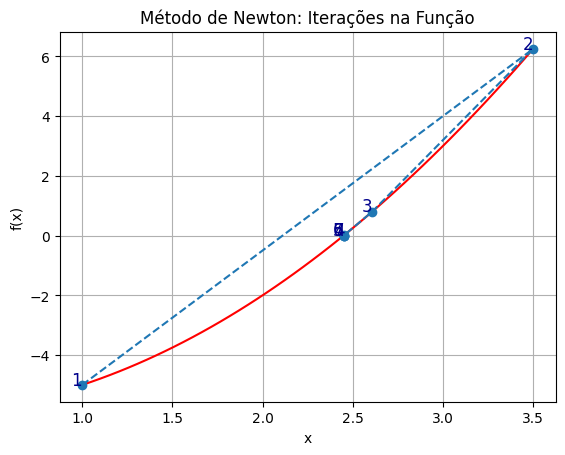

In [29]:
#Metodo de Newton
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp
#sympy está aqui como uma forma do usuário não ter que derivar
#manualmente, mas é importante levar em cosideração os problemas
#da derivação numérica ao pensar na precisão

#função simbólica, aqui se escreve a função a ser trabalhada
def fun_N():

    x = sp.symbols('x')
    #exemplos de funções
    #y = x**3 + x + 1
    #y = x**3 - x**2 + 2*x -1
    #y = sp.cos(x) - x
    y = x**2 - 6
    return y

#derivação, o resultado também
#é uma função simbólica
def D_fun_N():

    x = sp.symbols('x')
    dx = sp.diff(fun_N(), x)

    return dx

#aplica a função simbólica num ponto,
#devolve um float
def F_pontual(f, x0):

    x = sp.symbols('x')

    y = f.subs(x, x0)

    #print(x0, y)

    return y

#variáveis globais
past=[]
contador = 0

def Met_Newton(x0, tol, maxit):
    '''
    x0 é o chute inicial,
    tol é a tolerância,
    maxit é o n máximo de iterações.
    '''
    #variáveis globais
    global contador
    contador += 1

    past.append(x0) #armazena os valores para examinar depois

    y = F_pontual(fun_N(), x0)
    dy = F_pontual(D_fun_N(), x0)
    x = float(x0 - y/dy)

    if contador >= maxit:
        print('não convergiu a tempo', x)
        return x

    if abs(x - x0)/abs(x0) <= tol:
        print('a raiz se encontra em x = {}; convergiu em {} iterações'.format(x, contador))
        return x
    else:
        Met_Newton(x, tol, maxit)

Met_Newton(1, 1e-12, 200)

#plots:

#função
dominio = np.linspace(min(past), max(past), 50)
imagem = [F_pontual(fun_N(), i) for i in dominio]
plt.plot(dominio, imagem, 'r')

#iterações
plt.plot(past, [F_pontual(fun_N(), im) for im in past], 'o--')
for i, (x, y) in enumerate(zip(past, [F_pontual(fun_N(), im) for im in past])):
    plt.text(x, y, f'{i+1}', fontsize=12, ha='right', color='darkblue')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Método de Newton: Iterações na Função')
plt.grid(True)

plt.show()



#### Iterativo

a raiz se encontra em x = 2.449489742783178; convergiu em 6 iterações
-8.88178419700125e-16


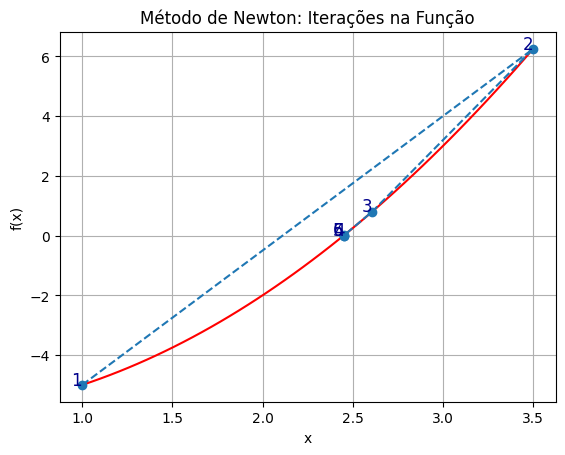

In [30]:
#Metodo de Newton
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp
#sympy está aqui como uma forma do usuário não ter que derivar
#manualmente, mas é importante levar em cosideração os problemas
#da derivação numérica ao pensar na precisão

#função simbólica
def fun_N():

    x = sp.symbols('x')
    #exemplos de funções
    #y = x**3 + x + 1
    #y = x**3 - x**2 + 2*x -1
    #y = sp.cos(x) - x
    y = x**2 - 6
    return y

#derivação, o resultado também
#é uma função simbólica
def D_fun_N():

    x = sp.symbols('x')
    dx = sp.diff(fun_N(), x)

    return dx

#aplica a função simbólica num ponto,
#devolve um float
def F_pontual(f, x0):

    x = sp.symbols('x')

    y = f.subs(x, x0)

    #print(x0, y)

    return y

#variáveis globais
past=[]

def Met_Newton(x0, tol, maxit):

    '''
    x0 é o chute inicial,
    tol é a tolerância,
    maxit é o n máximo de iterações.
    '''

    #variáveis globais
    contador = 0

    y = F_pontual(fun_N(), x0)
    dy = F_pontual(D_fun_N(), x0)
    x = float(x0 - y/dy)

    while abs(x - x0)/abs(x0) >= tol:
        contador += 1
        past.append(x0) #armazena os valores para examinar depois
        if contador >= maxit:
            print('não convergiu a tempo', x)
            return x

        x0 = x
        y = F_pontual(fun_N(), x0)
        dy = F_pontual(D_fun_N(), x0)
        x = float(x - y/dy)

    print('a raiz se encontra em x = {}; convergiu em {} iterações'.format(x, contador))
    return y


print(Met_Newton(1, 1e-12, 200))

#plots:

#função
dominio = np.linspace(min(past), max(past), 50)
imagem = [F_pontual(fun_N(), i) for i in dominio]
plt.plot(dominio, imagem, 'r')

#iterações
plt.plot(past, [F_pontual(fun_N(), im) for im in past], 'o--')
for i, (x, y) in enumerate(zip(past, [F_pontual(fun_N(), im) for im in past])):
    plt.text(x, y, f'{i+1}', fontsize=12, ha='right', color='darkblue')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Método de Newton: Iterações na Função')
plt.grid(True)

plt.show()



#### Cálculo de raizes quadradas

##### Digamos que queremos calcular a raiz quadrada $x = \sqrt{x_0}$ de algum número $x_0$, como $x_{n+1} = x_{n} - \frac{f(x_n)}{f'(x_n)}$, então com problema equivalente $x^2 = x_0$, escrevemos $x^2-x_0 = 0 = f(x)$. Logo, transformamos o problema de achar a raiz quadrada em achar um $x^*$ raiz de $f(x)$, isto é: $x_{n+1} = x_{n} - \frac{x_n^2-x_0}{2x_n} = -\frac{-2x_n^2+x_n^2-x_0}{2x_n} = \frac{x_n}{2}+\frac{x_0}{2x_n}$.

In [31]:
#raizes secant
#Metodo da secante
import numpy as np
import matplotlib.pyplot as plt

def Met_Raiz_Newton(x0, tol, maxit, raiz):
    #queremos resolver o problema x = sqrt(raiz)
    contador = 0
    x = x0/2 + raiz/(2*x0)

    while abs(x - x0)/abs(x0) >= tol:
        past.append(x0)
        contador += 1
        if contador >= maxit:
            print('não convergiu a tempo', x)
            return x
        x0 = x
        x = x0/2 + raiz/(2*x0)
    print('ITERAÇÕES:', contador, '\n A RAIZ É:', x)
    return x

past = []

print(Met_Raiz_Newton(5, 1e-19, 200, 25.4) - np.sqrt(25.4))
print(*past)

ITERAÇÕES: 3 
 A RAIZ É: 5.039841267341661
0.0
5 5.04 5.03984126984127


### Método da secante

#### Ao invés de exigir a derivada explicitamente, aproxima-a e aplica o método de Newton, exige dois chutes iniciais

#### Recursivo

8 0.7390851332151607


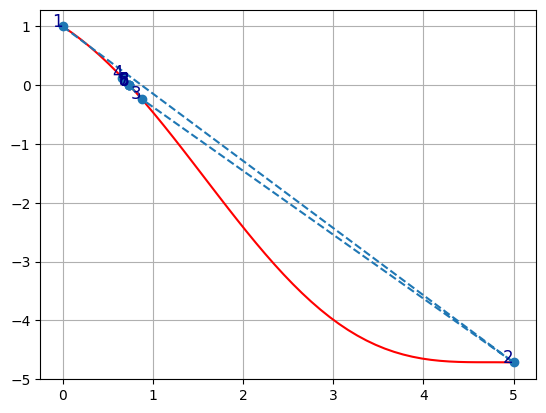

In [32]:
#Metodo da secante
import numpy as np
import matplotlib.pyplot as plt

def fun_S(x):

    y = np.cos(x) - x

    return y

past=[]

def Met_Secante(x0, x1, tol, maxit):

    global contador

    contador += 1
    past.append(x0)

    y0 = fun_S(x0)
    y1 = fun_S(x1)

    x = x1 - (y1)*(x1 - x0)/(y1 - y0)

    if contador >= maxit:
        print('não convergiu a tempo', x)
        return x

    if abs(x - x1)/abs(x1) <= tol:
        print(contador, x)
        return x
    else:
        Met_Secante(x1, x, tol, maxit)

contador = 0
epsilon = 1e-40
maxiteracoes = 200

Met_Secante(0, 5, epsilon, maxiteracoes)

#plots
dom = np.linspace(min(past), max(past))
plt.plot(dom, [fun_S(im) for im in dom], 'r')

plt.plot(past, [fun_S(im) for im in past], 'o--')

for i, (x, y) in enumerate(zip(past, [fun_S(im) for im in past])):
    plt.text(x, y, f'{i+1}', fontsize=12, ha='right', color='darkblue')

plt.grid(True)
plt.show()



#### Iterado

7 0.7390851332151607


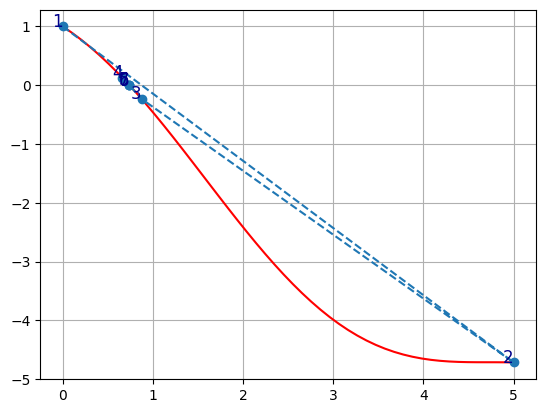

In [ ]:
#Metodo da secante
import numpy as np
import matplotlib.pyplot as plt

def fun_S(x):

    y = np.cos(x) - x

    return y

past=[]

def Met_Secante(x0, x1, tol, maxit):

    y0 = fun_S(x0)
    y1 = fun_S(x1)

    x = x1 - (y1)*(x1 - x0)/(y1 - y0)

    contador = 0
    while abs(x - x1)/abs(x1) >= tol:
        contador += 1
        past.append(x0)
        if contador >= maxit:
            print('não convergiu a tempo', x)
            return x
        x0 = x1
        x1 = x
        y0 = fun_S(x0)
        y1 = fun_S(x1)
        x = x1 - (y1)*(x1 - x0)/(y1 - y0)

    print(contador, x)
    return x

epsilon = 1e-40
maxiteracoes = 200

Met_Secante(0, 5, epsilon, maxiteracoes)

#plots
dom = np.linspace(min(past), max(past))
plt.plot(dom, [fun_S(im) for im in dom], 'r')

plt.plot(past, [fun_S(im) for im in past], 'o--')

for i, (x, y) in enumerate(zip(past, [fun_S(im) for im in past])):
    plt.text(x, y, f'{i+1}', fontsize=12, ha='right', color='darkblue')

plt.grid(True)
plt.show()



### Iteração do ponto fixo

#### Um ponto fixo de uma função $f(x)$ é um ponto $x^*$ que satisfaz $f(x^*) = x^*$; isto é, a função aplicada em $x^*$ devolve o proprio $x^*$.
![](https://upload.wikimedia.org/wikipedia/commons/thumb/3/3c/Fixed_Point_Graph.png/330px-Fixed_Point_Graph.png)
#### O método do ponto fixo consiste em iterar a função $f(x)$ t.q. $x_{n+1} = f(x_{n})$ e esperar que ela convirga a um ponto com as propriedades do ponto fixo. Existem algumas formas de [garantir que isso aconteça](https://pt.wikipedia.org/wiki/Itera%C3%A7%C3%A3o_de_ponto_fixo), com condições que relacionam o chute inicial $x_0$ e a função $f(x)$.
![](https://upload.wikimedia.org/wikipedia/commons/thumb/e/ea/Cosine_fixed_point.svg/270px-Cosine_fixed_point.svg.png)

#### Recursivo

a raiz se encontra em x = 0.7390851332151231; convergiu em 71 iterações


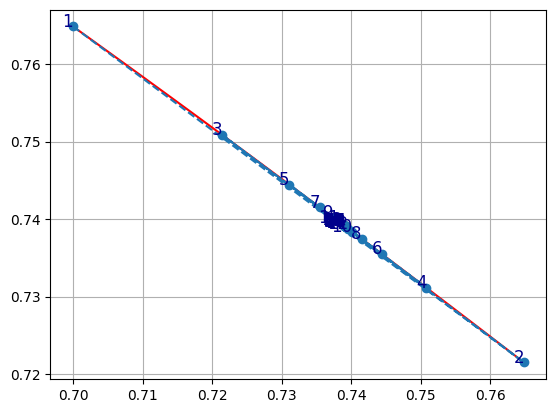

In [ ]:
#Método do ponto fixo
import numpy as np
import matplotlib.pyplot as plt

def F_g(x):
    #exemplo x = cos(x)
    y = np.cos(x)

    return y

counter = 0
epsilon = 1E-13

past=[]

def pto_fixo(x):

    global counter

    past.append(x)
    counter += 1

    if abs(F_g(x) - x) / abs(x) <= epsilon:
        print('a raiz se encontra em x = {}; convergiu em {} iterações'.format(x, counter))
        return x
    else:
        pto_fixo(F_g(x))
    return

pto_fixo(0.7)

#plots
dom = np.linspace(min(past), max(past))
plt.plot(dom, [F_g(im) for im in dom], 'r')

plt.plot(past, [F_g(im) for im in past], 'o--')

for i, (x, y) in enumerate(zip(past, [F_g(im) for im in past])):
    plt.text(x, y, f'{i+1}', fontsize=12, ha='right', color='darkblue')

plt.grid(True)
plt.show()

#### Iterativo

a raiz se encontra em x = 0.7390851332151859; convergiu em 70 iterações


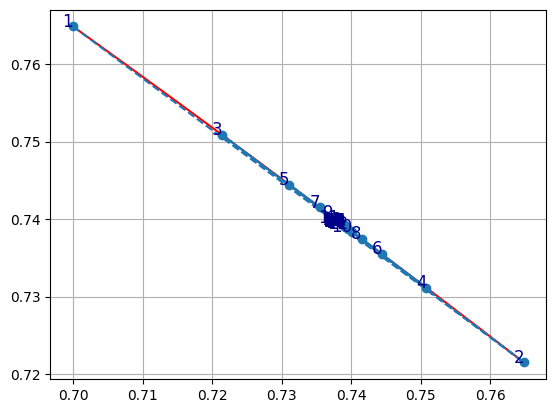

In [ ]:
#Método do ponto fixo
import numpy as np
import matplotlib.pyplot as plt

def F_g(x):
    #exemplo x = cos(x)
    y = np.cos(x)

    return y

epsilon = 1E-13
past=[]

def pto_fixo(x_0):
    x = F_g(x_0) #inicializar
    counter = 0
    while abs(x - x_0) / abs(x_0) >= epsilon:
        past.append(x_0)
        counter += 1
        x_0 = x
        x = F_g(x_0)

    print('a raiz se encontra em x = {}; convergiu em {} iterações'.format(x, counter))
    return x

pto_fixo(0.7)

#plots
dom = np.linspace(min(past), max(past))
plt.plot(dom, [F_g(im) for im in dom], 'r')

plt.plot(past, [F_g(im) for im in past], 'o--')

for i, (x, y) in enumerate(zip(past, [F_g(im) for im in past])):
    plt.text(x, y, f'{i+1}', fontsize=12, ha='right', color='darkblue')

plt.grid(True)
plt.show()